<a href="https://colab.research.google.com/github/mayraberrones94/FCFM/blob/master/Regresion_clase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de Regresion

- Regresion Linear
- Arboles de decision

# Metricas de evaluacion

En el caso de los modelos de regresion, tenemos que predecir valores continuos y no clases de manera individual, por esto, este tipo de modelo se evaluan distinto de como evaluariamos el rendimiento de un modelo de clasificacion. A continuacion presentaremos las mas populares.

- MAE (Mean absolute error)
- MSE (Mean squared error)
- RMSE (Root mean squared error)
- R squared

## Mean absolute error (MAE)

Definimos esta metrica como l diferencia entre el verdadero valor y el valor predecido de una variable continua. Cuando nosotros hacemos una prediccion de una variable constnte, algunos de los valores predichos pueden estar por debajo de los valores verdaderos, o viseversa.

Si nosotros consideramos las diferencias entre los valores verdaderos y las predicciones, algunos de estos valores se cancelan entre ellos, por lo cual nosotros debemos tomar el valor absoluto de la diferencia entre lo verdadero y la prediccion. Esto cancela cualquier valor negativo que tengamos, y es el valor fundamental medio de las diferencias entre los valores reales y predichos.

\begin{align}
       MAE= \frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y_i}|
\end{align}

Es importante notar que esta metrica no es sensible a los outliers.

In [ ]:
import numpy as np

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

In [ ]:
true = [1,2,3,4,5,6]
predicted = [1,3,4,4,5,9]

print(mae(true, predicted))

0.8333333333333334


In [ ]:
#Practica 1.1: Con la libreria de sklearn, obtener el MAE de un array de valores.

from sklearn.metrics import mean_absolute_error
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

## Mean squared error (MSE)

Como vimos en la metrica de MAE, el MSE mide las diferencias entre los valores verdaderos y las predicciones. Toma los cuadrados de las diferencias entre las predicciones correctas en lugar de tomar los valores absolutos. Matematicamente, es el promedio de las diferencias cuadradas entre los verdaderos y las predicciones.

\begin{align}
       MSE= \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2
\end{align}

A diferencia del MAE, este modelo si es sensible a los outliers.

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict({
    'x': [1,2,3,4,5,6,7,8,9,10], 
    'y': [1,2,2,4,4,5,6,7,9,10]})

print(df.head())

   x  y
0  1  1
1  2  2
2  3  2
3  4  4
4  5  4


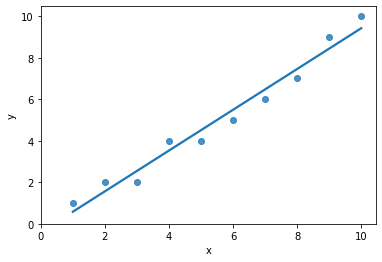

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(data=df, x='x', y='y', ci=None)
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.show()

In [ ]:
# Usar la libreria de sklearn para utilizar esta metrica
from sklearn.metrics import mean_squared_error

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

## Root mean squared error (RMSE)

RMSE es casi lo mismo que MSE, excepto que toma la raíz cuadrada del error cuadrático medio. Es la métrica de evaluación más popular y supera cualquier inconveniente que tengan MAE o MSE. Matemáticamente es la raíz cuadrada del promedio de la diferencia al cuadrado entre los valores reales y las predicciones.

\begin{align}
       RMSE= \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2}
\end{align}

Tomen en cuenta que esta metrica es sensible a los outliers.



NOTA:

Un valor de error absoluto medio perfecto es 0,0, lo que significa que todas las predicciones coincidieron exactamente con los valores esperados.

Este casi nunca es el caso, y si sucede, sugiere que su problema de modelado predictivo es trivial.

Una buena metrica de evaluacion es relativa a su conjunto de datos específico.

Es una buena idea establecer primero una metrica de referencia para su conjunto de datos utilizando un modelo predictivo ingenuo, como predecir el valor objetivo medio del conjunto de datos de entrenamiento. Un modelo que logra una metrica mejor que la que se utiliza para el modelo ingenuo tiene la ventaja.

## R Squared 

Esta metrica es diferente a la métrica de regresión que discutimos anteriormente. Considera las predicciones de nuestro modelo y el valor promedio de nuestra variable dependiente. Hay dos formas en que se puede interpretar R Squared; una es que describe cuánta variación en la variable dependiente se explica por nuestro conjunto actual de variables independientes, la otra interpretación es que dice cuán mejor es nuestro modelo actual en comparación con solo predecir el valor promedio de la variable dependiente para todos los datos puntos. R Squared se define mediante la fórmula dada a continuación,

\begin{align}
 R^2 = 1 - \frac{SS_{RES}}{SS_{TOT}} = 1 - \frac{\sum_i (y_i - \hat{y_i})^2}{\sum_i (y_i - \overline{y})^2}
\end{align}

Como podemos ver arriba, en el numerador de la fórmula, restamos los valores predichos de nuestro modelo de los valores reales y los elevamos al cuadrado. En el denominador, quitamos el valor promedio de nuestro valor dependiente de los valores fundamentales y lo elevamos al cuadrado.

In [ ]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'hours': [1, 2, 2, 4, 2, 1, 5, 4, 2, 4, 4, 3, 6],
                   'prep_exams': [1, 3, 3, 5, 2, 2, 1, 1, 0, 3, 4, 3, 2],
                   'score': [76, 78, 85, 88, 72, 69, 94, 94, 88, 92, 90, 75, 96]})

#view DataFrame
print(df)

    hours  prep_exams  score
0       1           1     76
1       2           3     78
2       2           3     85
3       4           5     88
4       2           2     72
5       1           2     69
6       5           1     94
7       4           1     94
8       2           0     88
9       4           3     92
10      4           4     90
11      3           3     75
12      6           2     96


In [ ]:
from sklearn.linear_model import LinearRegression

#initiate linear regression model
model = LinearRegression()

#define predictor and response variables
X, y = df[["hours", "prep_exams"]], df.score

#fit regression model
model.fit(X, y)

#calculate R-squared of regression model
r_squared = model.score(X, y)

#view R-squared value
print(r_squared)

0.71755417141059


In [ ]:
# Utilizando la libreria de sklearn, utilizar los valores anteriores para revisar el r2

from sklearn.metrics import r2_score

# Algoritmos de regresion con ejemplos

## Regresion Lineal

La regresión lineal es un método de regresión estadística sencillo y silencioso que se utiliza para el análisis predictivo y muestra la relación entre las variables continuas. La regresión lineal muestra la relación lineal entre la variable independiente (eje X) y la variable dependiente (eje Y), por lo que se denomina regresión lineal.

En este caso en python, para la regresion lineal se tiene la libreria de statsmodels, el cual es un modulo que nos proporciona clases y funciones para le estimacion de muchos modelos estadisticos. Nos ayuda tamien en tests estadisticos y exploracion de datos.


> Recordando: La regresión es un método para modelar un valor objetivo basado en predictores independientes. Este método se utiliza principalmente para pronosticar y descubrir la relación de causa y efecto entre las variables. Las técnicas de regresión en su mayoría difieren según el número de variables independientes y el tipo de relación entre las variables independientes y dependientes.


### Funcion de costo

La función de costo nos ayuda a determinar los mejores valores posibles para a_0 y a_1 que proporcionarían la mejor línea de ajuste para los puntos de datos. Dado que queremos los mejores valores para a_0 y a_1, convertimos este problema de búsqueda en un problema de minimización en el que nos gustaría minimizar el error entre el valor predicho y el valor real.

\begin{align}
  minimize \frac{1}{n}\sum_{i=1}^n (pred_i - y_i)^2
\end{align}

\begin{align}
  J = \frac{1}{n}\sum_{i=1}^n (pred_i - y_i)^2
\end{align}

La diferencia entre los valores predichos y respuesta verdadera mide la diferencia de error. Cuadramos la diferencia de error y sumamos todos los puntos de datos y dividimos ese valor por el número total de puntos de datos. Esto proporciona el error cuadrático promedio sobre todos los puntos de datos. Por lo tanto, esta función de costo también se conoce como la función de error cuadrático medio (MSE). Ahora, usando esta función MSE, vamos a cambiar los valores de a_0 y a_1 de modo que el valor de MSE se establezca en los mínimos.


### Funcion de gradiente

El siguiente concepto importante necesario para comprender la regresión lineal es el descenso de gradiente. El descenso de gradiente es un método para actualizar a_0 y a_1 para reducir la función de costo (MSE). La idea es que comencemos con algunos valores para a_0 y a_1 y luego cambiemos estos valores iterativamente para reducir el costo. El descenso de gradiente nos ayuda a cambiar los valores.




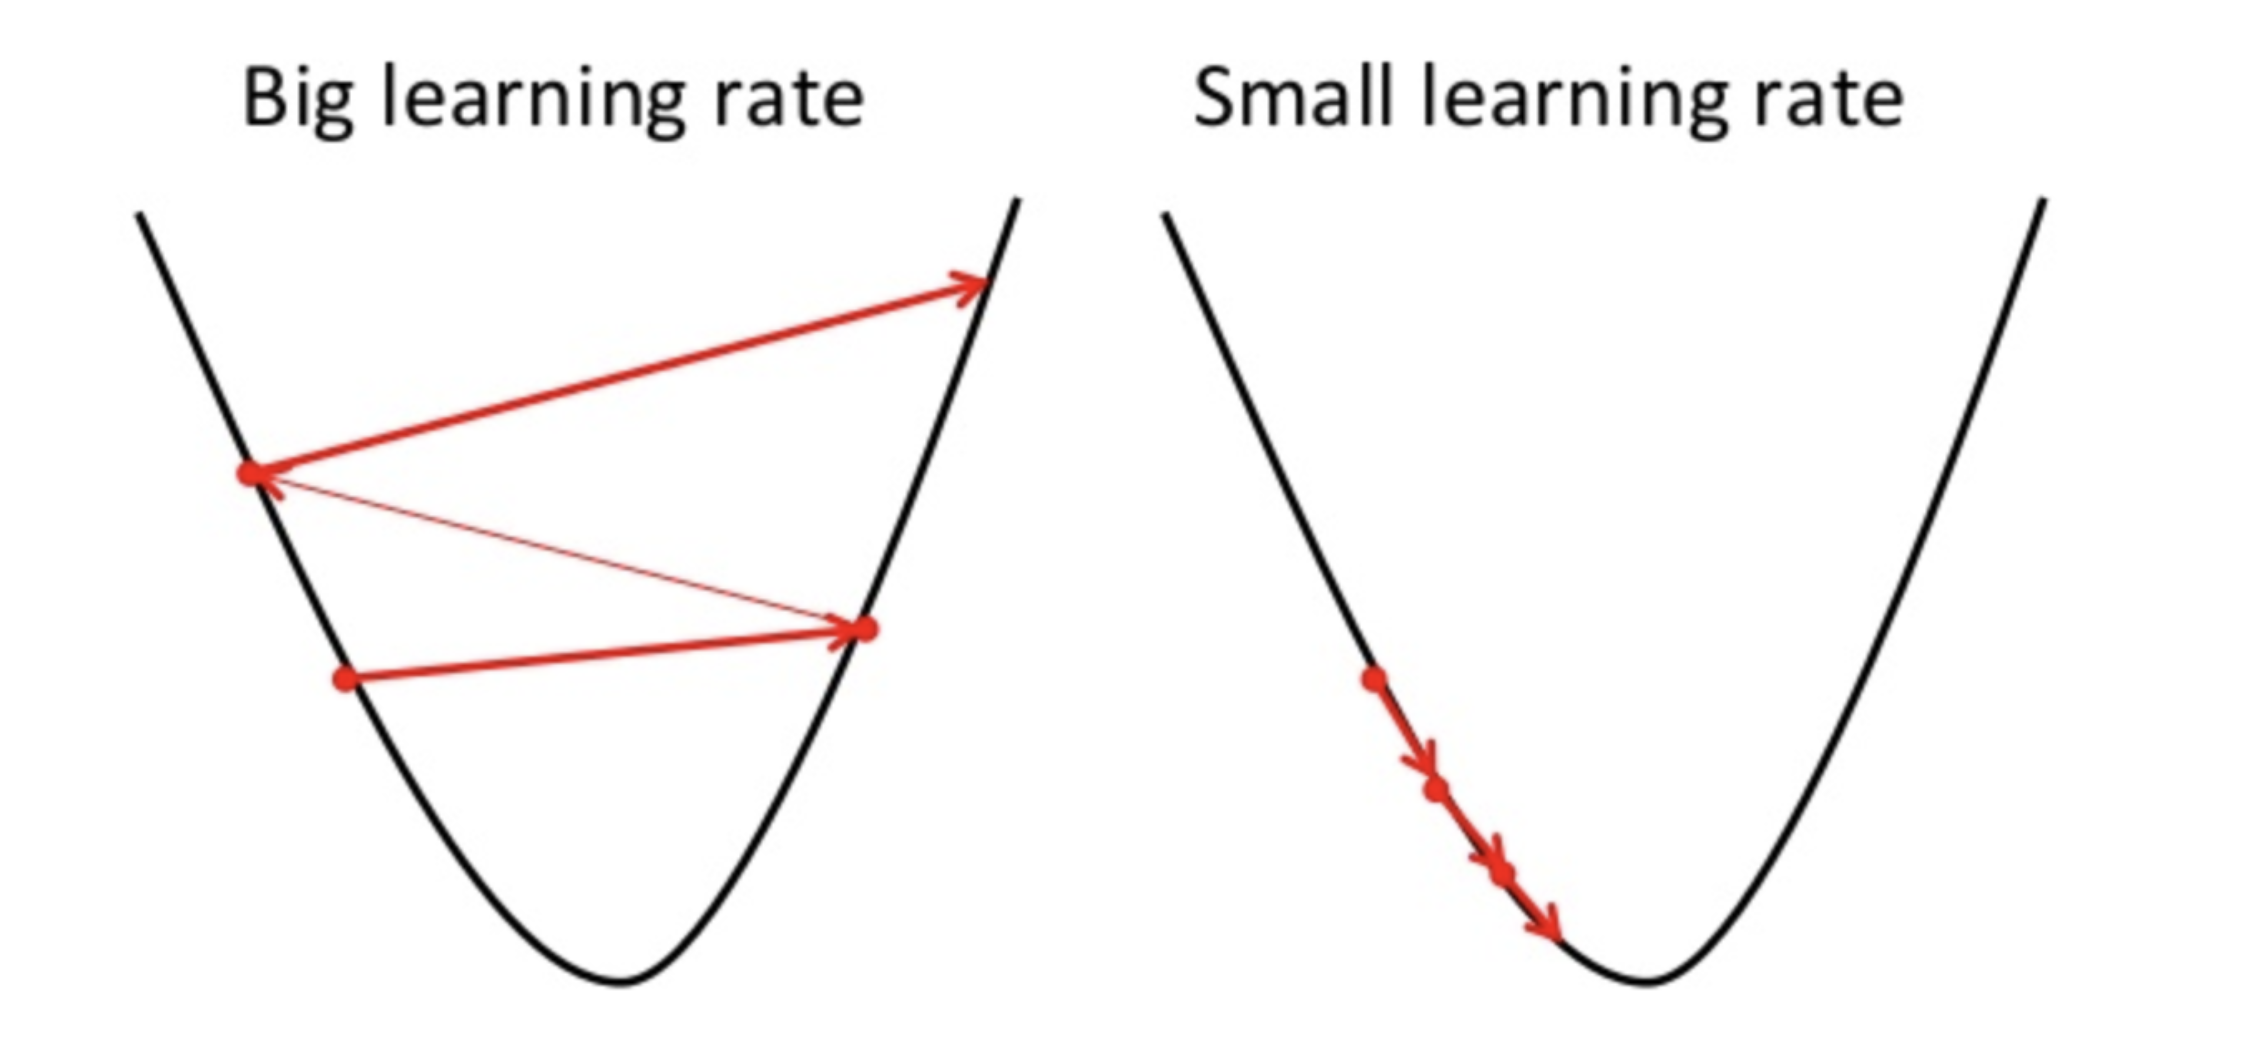

In [ ]:
import statsmodels.api as sm
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
import numpy as np
import pandas as pd
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [ ]:
import statsmodels.api as sm

X = df["RM"]
y = target["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):                   3.74e-256
Time:                        10:22:07   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Interpretacion basica:

- Dep. Variable: Nos muestra cual es la variable dependiente que elegimos.
- Df. residuals: Es otro nombre que se le da a los grados de libertad que tiene nuestro modelo.
- Df. Model: es el numero de variables predictoras.
- Covariance type: Recordando que la varianza es una de las medidas que nos ayudan a determinar que tan fuerte o robusta es una relacion entre dos variables, ya sea negativa a positiva. Una covarianza robusta se calcula para determinar cuales son las variables que hay que minimizar o eliminar. Como en este caso menciona no robusta, no es el caso.
- R-squared: Es la medida de que tanto podemos explicar los cambios de la variable independiente si se hacen cambios en la variable dependiente.
- Adjusted Rsquare: Es cuando es importante analizar multiples variables dependientes.


- coef: Es la medida de cambio que ocasiona esa variable dentro de la variable dependiente. si el coeficiente es negativo, tienen una relacion inversa. si este valor aumenta, el otro disminuye.

- std error: Estima la desviacion estandar de nuestro coeficiente, en donde medimos la cantidad de variacion en el coeficiente a lo largo de todos sus puntos o datos. 
- t: esta esta relacionada con std error y es una medida de presicion. Si tenemos un valor bajo de std error y un valor de coeficiente alto produce un t alto. (Esto quiere decir una gran significancia para nuestro coeficiente)

- p > t: este valor es muy importante, ya que determina cual es la probabilidad de que la variable que elegimos no tenga ningun efecto dentro de la variable dependiente.

Los valores que estan dentro de los corchetes con valores de nuestro coeficiente que estan dentro del 95% de nuestro datos. Esto quiere decir que fuera de estos valores, podemos considerarlos como outliers.

In [ ]:
import statsmodels.api as sm # import statsmodels 

X = df["RM"] ## X usually means our input variables (or independent variables)
y = target["MEDV"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           2.49e-74
Time:                        10:22:07   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X = df[["RM", "LSTAT"]]
y = target["MEDV"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4637.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):                        0.00
Time:                        10:22:08   Log-Likelihood:                         -1582.9
No. Observations:                 506   AIC:                                      3170.
Df Residuals:                     504   BIC:                                      3178.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
from sklearn import linear_model

X = df
y = target["MEDV"]

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [ ]:
predictions = lm.predict(X)
print(predictions)

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211 18.99949651 21.58679568
 20.90652153 19.55290281 19.28348205 19.29748321 20.52750979 16.91140135
 16.17801106 18.40613603 12.52385753 17.67103669 15.83288129 13.80628535
 15.67833832 13.38668561 15.46397655 14.70847428 19.54737285 20.8764282
 11.45511759 18.05923295  8.81105736 14.28275814 13.70675891 23.81463526
 22.34193708 23.10891142 22.91502612 31.35762569 34.21510225 28.02056414
 25.20386628 24.60979273 22.94149176 22.09669817 20.42320032 18.03655088
  9.10655377 17.20607751 21.28152535 23.97222285 27.6558508  24.04901809
 15.3618477  31.15264947 24.85686978 33.10919806 21.77537987 21.08493555
 17.8725804  18.51110208 23.98742856 22.55408869 23.37308644 30.36148358
 25.53056512 21.11338564 17.42153786 20.78483633 25.20148859 21.7426577
 24.55744957 24.04295712 25.50499716 23.9669302  22.94545403 23.35699818
 21.26198266 22.42817373 28.40576968 26.99486086 26.0

In [ ]:
lm.score(X,y)

0.7406426641094095

In [ ]:
lm.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [ ]:
lm.intercept_

36.459488385090125

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
clf = LinearRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(r2_score(y_test,y_pred))

0.6121513488009118


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 3.5598910260147334
MSE: 34.59057280159743
RMSE: 5.881375077445531


## Arboles de decision para regresion

In [ ]:
import pandas as pandas
import matplotlib.pyplot as plt

dataset = pd.read_csv("/content/drive/MyDrive/Datasets/Datos_curso/possum.csv")
dataset.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [ ]:
dataset = dataset.dropna()
dataset.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [ ]:
X = dataset.drop(["case", "site", "Pop", "sex", "age"], axis=1)

y = dataset["age"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(r2_score(y_test,predictions))
print(predictions)

-0.14124929656724827
[4. 2. 6. 4. 2. 5. 5. 1. 2. 2. 3. 7. 3. 4. 3. 6. 2. 2. 2. 1. 4. 2. 2. 3.
 3. 5.]


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=y_test,y_pred=predictions)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=predictions) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=predictions,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.4615384615384615
MSE: 3.0
RMSE: 1.7320508075688772


[Text(0.3304398148148148, 0.9444444444444444, 'hdlngth <= 91.55\nsquared_error = 3.905\nsamples = 75\nvalue = 3.96'),
 Text(0.05555555555555555, 0.8333333333333334, 'chest <= 23.75\nsquared_error = 0.871\nsamples = 21\nvalue = 2.286'),
 Text(0.037037037037037035, 0.7222222222222222, 'squared_error = 0.0\nsamples = 4\nvalue = 1.0'),
 Text(0.07407407407407407, 0.7222222222222222, 'footlgth <= 63.0\nsquared_error = 0.595\nsamples = 17\nvalue = 2.588'),
 Text(0.037037037037037035, 0.6111111111111112, 'eye <= 14.7\nsquared_error = 0.24\nsamples = 5\nvalue = 3.4'),
 Text(0.018518518518518517, 0.5, 'squared_error = 0.0\nsamples = 3\nvalue = 3.0'),
 Text(0.05555555555555555, 0.5, 'squared_error = 0.0\nsamples = 2\nvalue = 4.0'),
 Text(0.1111111111111111, 0.6111111111111112, 'skullw <= 54.65\nsquared_error = 0.354\nsamples = 12\nvalue = 2.25'),
 Text(0.09259259259259259, 0.5, 'squared_error = 0.0\nsamples = 3\nvalue = 3.0'),
 Text(0.12962962962962962, 0.5, 'taill <= 39.75\nsquared_error = 0.222

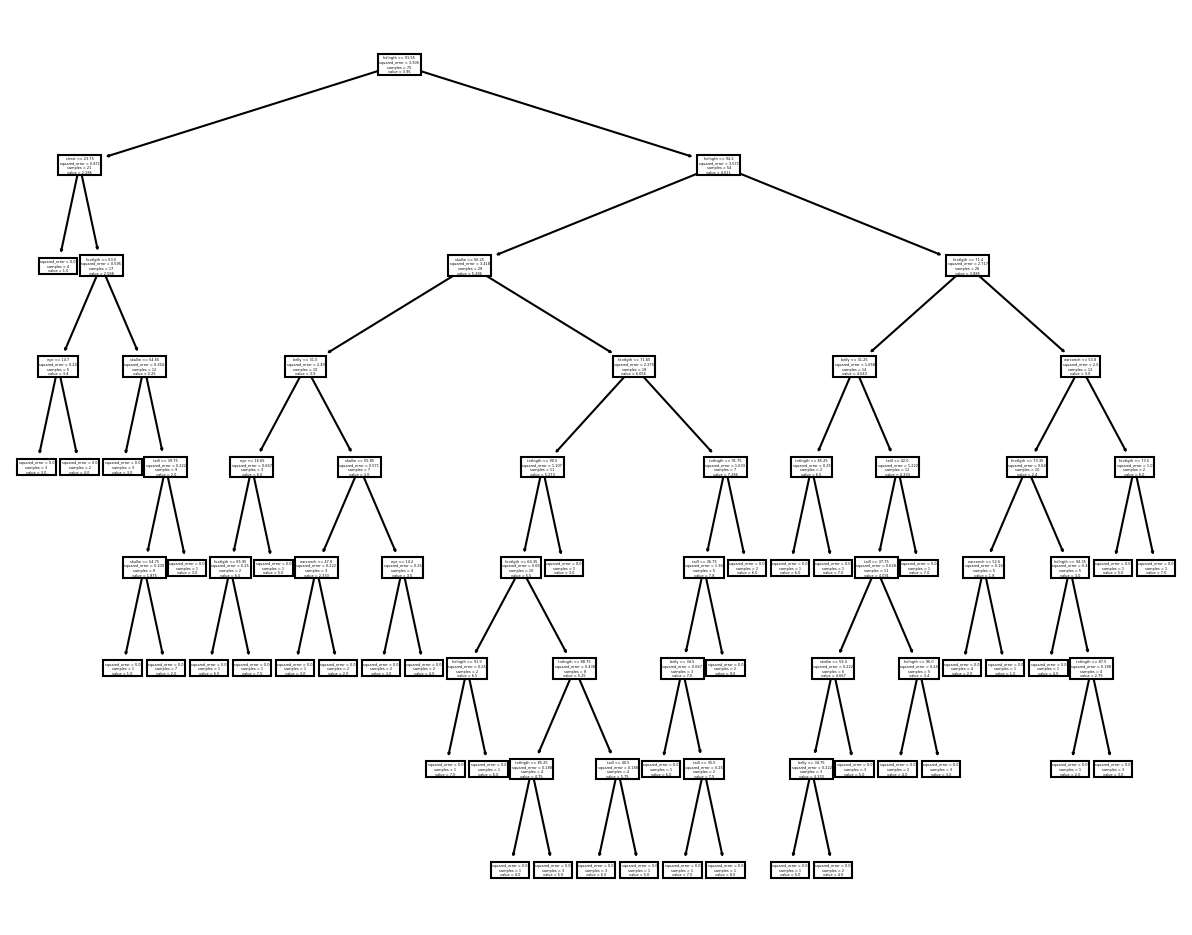

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns)

# Ridge regression

La regresión ridge es un método de ajuste de modelo que se utiliza para analizar cualquier dato que sufra de multicolinealidad. Este método realiza la regularización L2. Cuando ocurre el problema de la multicolinealidad, los mínimos cuadrados no están sesgados y las varianzas son grandes, lo que da como resultado que los valores predichos estén muy lejos de los valores reales.

Este tipo de modelos se usan para reducir los parametros, por lo que previene la multi colinearidad. Reduce la complejidad del modelo al disminuir el coeficiente.


Los supuestos de la regresión ridge son los mismos que los de la regresión lineal: linealidad, varianza constante e independencia. Sin embargo, dado que la regresión ridge no proporciona límites de confianza, no es necesario suponer que la distribución de errores sea normal.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
#
# Load the Sklearn Boston Dataset
#
boston_ds = datasets.load_boston()
X = boston_ds.data
y = boston_ds.target



MSE train: 22.547, test: 21.549
R^2 train: 0.743, test: 0.711


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 22.547, test: 21.549
R^2 train: 0.743, test: 0.711


## Stepwise regression

En cualquier fenómeno, habrá ciertos factores que jugarán un papel más importante en la determinación de un resultado. En términos simples, la regresión por pasos es un proceso que ayuda a determinar qué factores son importantes y cuáles no. Ciertas variables tienen un valor p bastante alto y no contribuyeron significativamente a la precisión de nuestra predicción. A partir de ahí, solo se mantienen los factores importantes para garantizar que el modelo lineal haga su predicción en función de los factores que pueden ayudarlo a producir el resultado más preciso.

[Mas info](https://towardsdatascience.com/stepwise-regression-tutorial-in-python-ebf7c782c922)

[Ejemplos](https://github.com/topics/stepwise-regression)